# 弹性

弹性是一种标准化的反应曲线（对微观经济学来说，就是需求曲线等）局部性质的参数。

## 弧弹性

> 需求的价格弹性(price elasticity of demand)
>
> 是指在需求曲线上数量变化与价格变化比率之间的比值（取绝对值）。

 定义是(中值法):
  $$E=\frac{\frac{Q_2-Q_1}{(Q_2-Q_1)/2}}{\frac{P_2-P_1}{(P_2+P_1)/2}}$$
  
  这个定义与一个弧相关，如果我们想取一个点上的代表值，只能不断间距往小了取，但可能每次都会得到不同的值，这时候我们需要引入微积分取极限来代表那个值，这就是点弹性。
  
## 点弹性

定义
$$E=\lim_{\Delta \to 0}\frac{\frac{\Delta Q}{Q_0}}{\frac{\Delta P}{P_0}}$$

等价于

$$E=\frac{P_0}{Q_0}\frac{dQ}{dP}$$

$dQ/dP$函数在$(P_0,Q_0)$上的值（懒得写限制符号）。于是给定一个函数Q=Q(P)，可以确定它在任意点上的弹性。

## 弹性的约束

为了看清弹性是如何刻画一个曲线的性质的，我们来假设一个曲线在各点的弹性相同。于是给定一个弹性$E$，又令一个曲线符合给定E作为处处弹性的曲线满足微分方程：

$$E\frac{Q}{P}=\frac{dQ}{dP}$$

易于变为一个变量分离方程，事实上

$$E\frac{1}{P}dP=\frac{1}{Q}dQ$$
两边积分
$$Eln|P|=ln|Q|+C$$
作为$exp(x)$的变量
$$P^E=CQ $$
当取$E=-1$时，（注意这里弹性虽然是不分正负的，但在需求弹性中要想work就得把它设成负的，由于它一般一直是负的所以也就不区分了）,得到
$$\frac{C}{P^{|E|}}=Q$$

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt

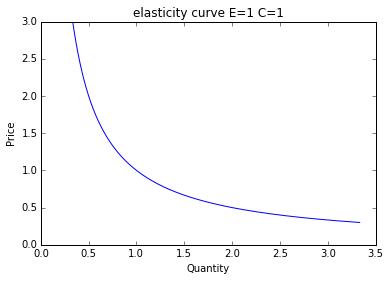

In [8]:
def elasticity_need(P,E,C):
    return C/float(P)**abs(E)
x=np.linspace(0.3,3,1000)
y=map(lambda x:elasticity_need(x,1,1),x)
plt.plot(y,x)
plt.xlabel('Quantity')
plt.ylabel("Price")
plt.title("elasticity curve E=1 C=1")
plt.show()

当然，上面是E=1，C=1的需求曲线，C通常是用初值条件确定的，如果不确定，微分方程可以确定一族曲线（存在唯一性定理），其线素场看上去像下面这样

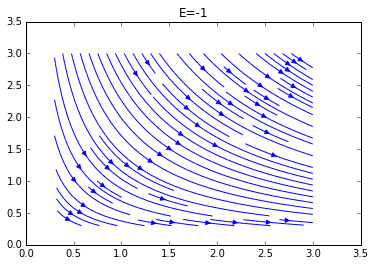

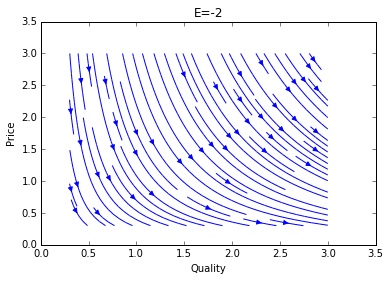

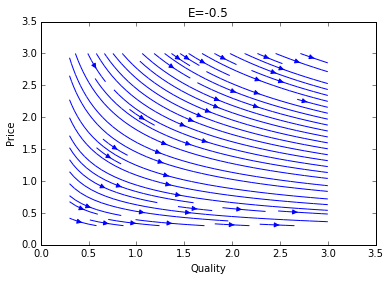

In [44]:
def k(P,Q,E):
    return E*(float(Q)/P)

def E_plot(E):
    #E=-2
    X=1/(np.sqrt(1+(E*(Q/P))**2))
    Y=(E*(Q/P))/(np.sqrt(1+(E*(Q/P))**2))

    plt.streamplot(P,Q,X,Y)
    plt.title("E="+str(E))
    plt.xlabel("Quality")
    plt.ylabel("Price")
    plt.show()

    

E=-1
#P, Q = np.mgrid[0.3:3:100j, 0.3:3:100j]
Q, P = np.mgrid[0.3:3:100j, 0.3:3:100j]#这个必须协同下面的streamplot必须顺序反的，不知道为什么，难道是因为连通这些线是顺序相关的？
X=1/(np.sqrt(1+(E*(Q/P))**2))
Y=(E*(Q/P))/(np.sqrt(1+(E*(Q/P))**2))

plt.streamplot(P,Q,X,Y)
plt.title("E=-1")
plt.show()

E_plot(-2)
E_plot(-0.5)

## 弹性与利润

观察

$$\frac{C}{P^{|E|}}=Q$$

只需要两边乘$P$，就可以得到收入的表示

$$I=PQ=\frac{C}{P^{|E|-1}}$$

显然，若$E=1$，则$I=PQ=C$，价格无论怎么取利润都是相同的。若$E<1$，则$P$越高利润越高。若$P>1$，则越低利润越高。当然这是在弹性处处保持恒定时才会发生的，具有显然的荒谬性。因为它始终有一个使利润无限大化的方向，事实上任何方向到达一定程度后都会使利润下降，如果一定要用弹性描述，就是弹性逐步反转。当然此规律在局部还是可行的，所以如果我们知道局部上是有弹性（$P>1$）还是“无”弹性（$P<1$），可以在局部借此优化获取更高利润。直到取到单位弹性处（稳定点）为止，因为如果不是单位弹性，就总存在一个局部优化使利润更高。

## 为什么使用弹性

反应局部性质的另一个传统工具是导数，事实上弹性定义中也出现了导数。但正如我们知道的，虽然为了说明概念简单在初级微观经济学中我们常用直线表示供需曲线，也就是导数为常值（对导数作为基本单位）的曲线。但实际上我们一般都是看到类似弹性为常数的那种弧线，所以从弹性为常数（基本单位）比从导数为常数（基本单位）讨论要容易。

导数为基本单元与弹性为基本单元的供需曲线

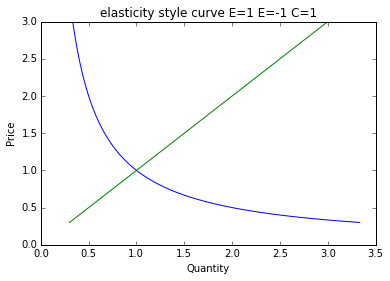

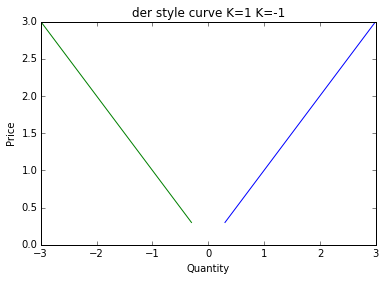

In [51]:
def elasticity_need_no_cheat(P,E,C):
    return C/float(P)**E

x=np.linspace(0.3,3,1000)
y=map(lambda x:elasticity_need_no_cheat(x,1,1),x)
plt.plot(y,x)
y=map(lambda x:elasticity_need_no_cheat(x,-1,1),x)
plt.plot(y,x)
plt.xlabel('Quantity')
plt.ylabel("Price")
plt.title("elasticity style curve E=1 E=-1 C=1")
plt.show()

x=np.linspace(0.3,3,1000)
y=x
plt.plot(y,x)
y=-x
plt.plot(y,x)
plt.xlabel('Quantity')
plt.ylabel("Price")
plt.title("der style curve K=1 K=-1")
plt.show()


恩。。出了一些问题，似乎并不应该直接这么写，两个似乎用一定数减其相反数（相对于标准的“需求”）那种对偶定义更好。难怪克鲁格曼没画供给的恒定弹性定义出的东西。不过作为需求的基础单位显然还是弹性恒定曲线更好，虽然都不靠谱。

另外这个_错误_也暗示我们交叉价格弹性里那个替代品的“正值”可能用起来并不一致。

# 剩余

> __单位消费者剩余__(individual consumer surplus) 是指这个消费者在购买商品是所获得的净收益
>
> __总消费者剩余__(total consumer surplus) 是指市场中所有消费者的消费者剩余的总和
>
> __消费者剩余__(consumer surplus) 是单位消费者剩余与总消费者剩余的统称

生产者剩余有类似的定义。剩余就是交易实际价格与它们的最高最低价格（超过那个价格就不买/卖了）的差值。能以更优的价格产生的交易所产生的效用就是剩余，用两值之差定义为剩余。

## 单供给曲线与总供给曲线的一个模型

为了体现单个剩余是如何生成一个总剩余的，我们先考虑单供给曲线是如何生成一个总供给曲线的，我们来进行如下简化。所有生产者卖或不卖仅一次对于特定商品。这个卖与不卖的界限以一个价格分隔。这个价格的取值是一个随机变量。与常见的错误相反，随机变量的分布函数的直接和（而不是卷积之类的东西）是我们这里定义的总需求曲线之形式。

下面是$U(0,1)$与$N(0,1)$取1000个随机值生成的总需求曲线。

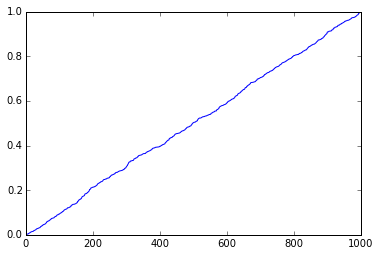

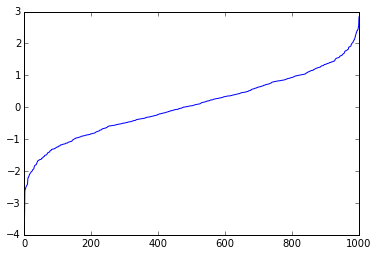

In [54]:
def count(xl):
    pl=sorted(xl)
    ql=range(1,len(pl)+1)
    return pl,ql

import scipy.stats as stats

ur=stats.uniform.rvs(size=1000)
nr=stats.norm.rvs(size=1000)

pl,ql=count(ur)
plt.plot(ql,pl)
plt.show()

pl,ql=count(nr)
plt.plot(ql,pl)
plt.show()

那个负值不妨理解为与某个给定价格的偏差。其形式与$cdf$的相似性不仅让我们想到，是否其实其就是随机变量。我们来画标准cdf(x，y轴反置)放大1000倍后与上述图像的对比。

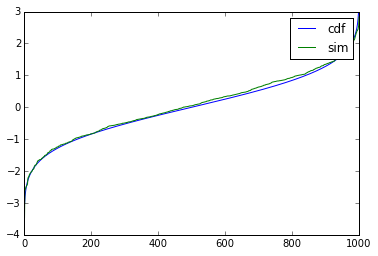

In [58]:
x=np.linspace(-3,3,1000)
y=stats.norm.cdf(x)
plt.plot(y*1000,x,label="cdf")
plt.plot(ql,pl,label="sim")
plt.legend()
plt.show()

Excelent!的确，仔细一想，我们的生成该曲线的过程，与$cdf$的定义不是极其类似吗，这一概念可以由下式所刻画：

设随机变量有随机变量X，则按以下放大定义另一个随机变量Y

由n个与X独立同同分布的随机变量组成随机变量列$X(n)$定义函数

$$f(y)=\mid \lbrace y < X_i(n) \mid \forall i \in X(n) \rbrace \mid$$

即给定一个$y$，函数值是随机变量列中取值小于该值得随机变量的个数。

以下述分布函数定义随机变量Y:

$$Y \sim \frac{f(y)}{n}$$

命题：当$n \to \infty $,$f(y)/n$弱收敛于$X$的分布函数$F_x(y)$，Y依分布收敛于随机变量X。

$$ \lim_{n \to \infty} \frac{f_n(y)}{n} \stackrel{W}{\to} F_x(y)$$

$$Y_n \stackrel{L}{\to} X$$

恩。。我当然没法讨论这个命题的正确性，不过看上去似乎是对的

## 总剩余

不得不指出总剩余的图像不太好画，对于matplotlib来说。缺乏“语法糖”，只能用其他“语法糖”以一种十分奇怪的方式组合起来，感觉像JavaScript而不是Python

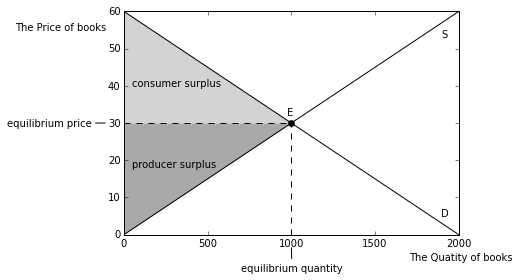

In [216]:
import matplotlib
#print dir(plt)

x1=np.linspace(0,1000,10)
x2=np.linspace(0,2000,10)
k=60.0/2000
y1=x1*k
y2=60-y1
#y3=np.zeros(len(x1))+30
y3=x1*0+30
y4=x2*k
y5=60-y4
y6=x2*0+30
fig, ax = plt.subplots()
#print dir(plt)

ax.fill_between(x1,y1,y3,color='darkgrey')
ax.fill_between(x1,y2,y3,color='lightgrey')
ax.plot(x2,y4,'black')
ax.plot(x2,y5,'black')
ax.plot(x1,y3,linestyle='--',color='black')
line=matplotlib.lines.Line2D([1000,1000],[0,30],linestyle='--',color="black")
ax.add_line(line)

ax.plot([1000],[30],'o',color="black")
ax.text(1000-20,30+2,'E')

ax.text(50,40,'consumer surplus')
ax.text(50,18,'producer surplus')
ax.text(1900,53,'S')
ax.text(1900,5,'D')

#circle=matplotlib.patches.Circle([1000,30],20,ec="none")
#ax.add_patch(circle)

ax.annotate('equilibrium quantity', xy=(1000, -3), xycoords=ax.transData,
            xytext=(-50, -25), textcoords='offset points',
            arrowprops=dict(arrowstyle="-")
            )
ax.annotate('equilibrium price', xy=(-100, 30), xycoords=ax.transData,
            xytext=(-100, -3), textcoords='offset points',
            arrowprops=dict(arrowstyle="-")
            )



plt.text(-650,55,"The Price of books")
#plt.xlabel("The Quatity of books")
plt.text(1700,-7,"The Quatity of books")
#plt.ylabel("The Price of books")
plt.show()



In [132]:
matplotlib.patches.Circle?